In [1]:
import os
os.chdir('../')

In [2]:
device='cpu'

In [3]:
import numpy as np
import pickle
import torch
import matplotlib.pyplot as plt
from datasets import inputs
from sr_model.models.models import AnalyticSR, STDP_SR
from eval import eval

/home/chingf/Code/sr-project/datasets/inputs.py:12: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")


## Set the datasets you want to test the model on

In [4]:
num_steps = 8000
num_states = 64
dsets = []
dset_labels = []

In [5]:
# Unbiased 1D Walk
dsets.append(
    inputs.Sim1DWalk(
        num_steps=num_steps,left_right_stay_prob=[1, 1, 1],
        num_states=num_states
        )
)
dset_labels.append('1D Walk (no bias)')

In [6]:
# Stay-biased 1D Walk
dsets.append(
    inputs.Sim1DWalk(
        num_steps=num_steps,left_right_stay_prob=[1, 7, 1],
        num_states=num_states
        )
)
dset_labels.append('1D Walk (stay-bias)')

In [7]:
# Right-biased 1D Walk
dsets.append(
    inputs.Sim1DWalk(
        num_steps=num_steps,left_right_stay_prob=[1, 1, 7],
        num_states=num_states
        )
)
dset_labels.append('1D Walk (right-bias)')

In [8]:
# 2D Random Walk
dsets.append(
    inputs.Sim2DWalk(
        num_steps=num_steps,
        num_states=num_states
        )
)
dset_labels.append('2D Walk')

In [9]:
# 2D Levy Flight
dsets.append(
    inputs.Sim2DLevyFlight(
        num_steps=num_steps,
        walls=int(np.sqrt(num_states)-1)
        )
)
dset_labels.append('Levy Flight')

## Run model on various datasets

In [11]:
results_true_v_rnn, results_est_v_rnn, results_true_v_est = eval(
    './trained_models/baseline/', dsets
    )

/home/chingf/Code/sr-project/datasets/inputs.py:192: UserWarning: True T estimate not implemented in Levy Flight dataset
  warnings.warn("True T estimate not implemented in Levy Flight dataset")


## Generate plots

## Plot error from true T in trained model

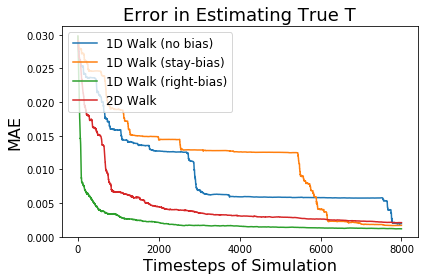

In [18]:
plt.figure()
for idx, label in enumerate(dset_labels):
    if 'Levy' in label: continue
    plt.plot(results_true_v_rnn[idx], label=label)
plt.title("Error in Estimating True T", fontsize=18)
plt.ylabel("MAE", fontsize=16)
plt.xlabel("Timesteps of Simulation", fontsize=16)
plt.xticks([0, 2000, 4000, 6000, 8000])
plt.ylim(0)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=12)
plt.legend(fontsize=12, loc="upper left")
plt.tight_layout()
plt.savefig('acc_true_v_rnn.png', dpi=100)
plt.show()

## Plot deviation from ideal estimator in trained model

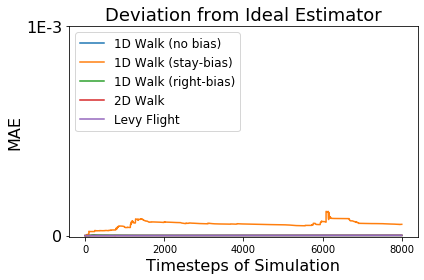

In [19]:
plt.figure()
for idx, label in enumerate(dset_labels):
    plt.plot(results_est_v_rnn[idx], label=label)
plt.title("Deviation from Ideal Estimator", fontsize=18)
plt.ylabel("MAE", fontsize=16)
plt.yticks([0, 1E-3], ['0', '1E-3'], fontsize=16)
plt.xlabel("Timesteps of Simulation", fontsize=16)
plt.xticks([0, 2000, 4000, 6000, 8000])
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=12)
plt.legend(fontsize=12, loc="upper left")
plt.tight_layout()
plt.savefig('acc_est_v_rnn.png', dpi=100)
plt.show()